### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from scipy import stats as st
from datetime import datetime
import random

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


В датафрейме 16715 строк, которые соотвествуют отдельной игре. Особенно много пропущенных значений в столбцах Critic_Score, User_Score, Rating. Эти данные скорее всего пропущены из-за отсутствия данных по конкретным играм. В остальных столбцах тоже есть пропущенные значения, но их не так много.

Анализируя описательные статистики, можно отметить, что год релиза варьируется от 1980 до 2016 годов. Больше всего продаж в Северной Америке. Меньше всего по другим регионам и Японии. Оценка критиков может составлять от 13 до 98 баллов, среднее значение - 68,9. Столбик user_score нужно перевести из сторкового в числовой тип данных, чтобы узнать аналогичные характеристики.

#### Описание данных

**Описание данных:**

* Name — название игры
* Platform — платформа
* Year_of_Release — год релиза
* Genre — жанр игры
* NA_players — продажи игрокам в Северной Америке (в миллионах долларов)
* EU_players — продажи игрокам в Европе (в миллионах долларов)
* RU_players — продажи игрокам в России (в миллионах долларов)
* Other_players — продажи игрокам в других странах
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг ESRB

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Описательные статистики

In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В датафрейме 16715 строк, которые соотвествуют отдельной игре. Особенно много пропущенных значений в столбцах Critic_Score, User_Score, Rating. Эти данные скорее всего пропущены из-за отсутствия данных по конкретным играм. В остальных столбцах тоже есть пропущенные значения, но их не так много.

Анализируя описательные статистики, можно отметить, что год релиза варьируется от 1980 до 2016 годов. Больше всего продаж в Северной Америке. Меньше всего по другим регионам и Японии. Оценка критиков может составлять от 13 до 98 баллов, среднее значение - 68,9. Столбик user_score нужно перевести из сторкового в числовой тип данных, чтобы узнать аналогичные характеристики.

### Предобработка данных

#### Замена названий столбцов

Приведем названия столбцов к нижнему регистру.

In [7]:
games.columns = games.columns.str.lower() # привели названия колонок к нижнему регистру

#### Преобразование данных в нужный тип

Посмотрим, какие именно столбцы нуждаются в преобразовании типов данных.

In [8]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [9]:
games['year_of_release'] = games['year_of_release'].fillna(0)

In [10]:
games['year_of_release'] = games['year_of_release'].astype('int')

Столбец user_score следует перевести в тип float, но в нем есть пропущенные значения.

In [11]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan 

In [13]:
games['user_score'] = games['user_score'].astype('float')

In [14]:
games.duplicated().sum()

0

#### Обработка пропусков

Еще раз проверим, какие именно столбцы содержат пропущенные значения.

In [15]:
games.isnull().sum().sort_values(ascending = False)

user_score         9125
critic_score       8578
rating             6766
genre                 2
name                  2
other_sales           0
jp_sales              0
eu_sales              0
na_sales              0
year_of_release       0
platform              0
dtype: int64

Очень много пропущенных значений в столбце с рейтингами, а именно рейтинг, пользовательский рейтинг, рейтинг критиков. Заполнять такие значения медианными показателями опасно, так как на рейтинг влияет слишком много факторов. Поэтому не будем заполнять эти значения.

#### Расчет суммарных продаж

In [16]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [17]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [18]:
games['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Суммарные продажи составляют от 0 до 82,54 млн. долларов, среднее значение - 0,53 млн. долл.

### Исследовательский анализ данных

#### Количество выпущенных игр в разные годы

Рассмотрим количество игр, которые были выпущены в разные годы. Построим график.

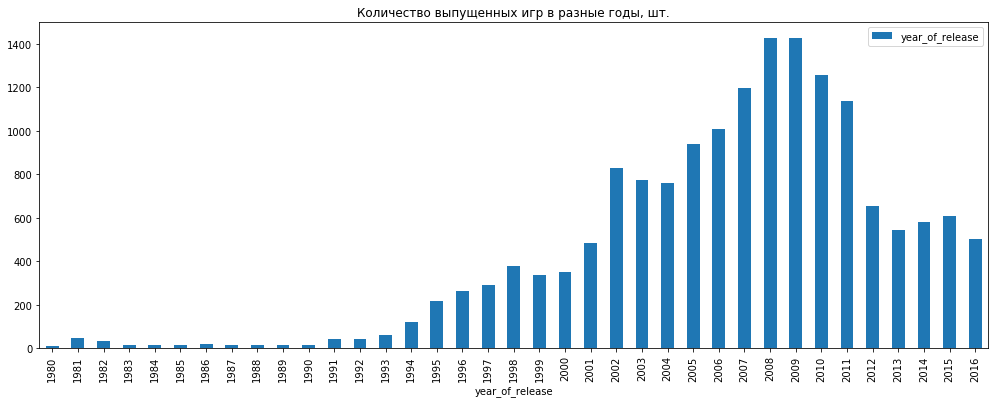

In [19]:
games[games['year_of_release'] != 0].groupby('year_of_release').agg({'year_of_release':'count'}).plot(
    kind='bar', figsize = (17, 6), title='Количество выпущенных игр в разные годы, шт.')

plt.show()

Из графика видно, что количество выпущенных игр имело восходящий тренд с 1980 г. до 2008 г. Пиковые значения приходятся на 2008 и 2009 годы. Далее количество игр падает.

Для анализа современной ситуации важнее данные за последние годы, например, за последние 5-10 лет перед запуском рекламной кампании.

#### Изменение продаж по платформам

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Исследуем характерный срок, в течение которого появляются новые и исчезают старые платформы.

In [20]:
top_platforms = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(
    by = 'total_sales', ascending=False).head(10)
top_platforms

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Платформы с наибольшими суммарными продажами - PS2, X360, PS3 и др.

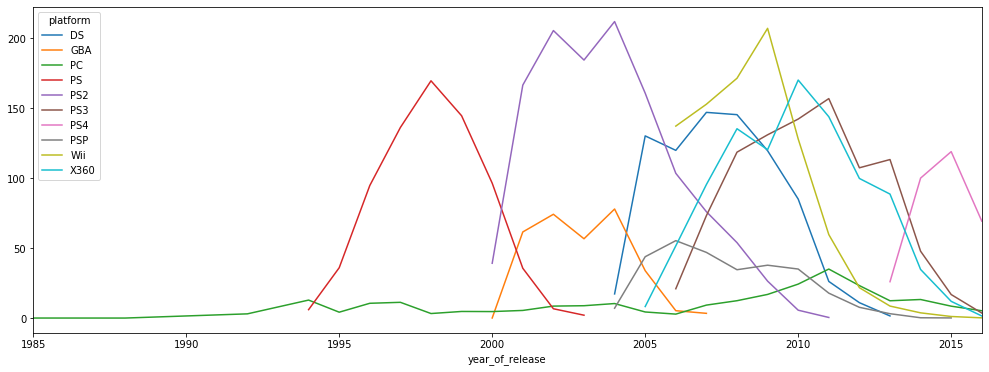

In [21]:
games[games['year_of_release'] != 0].query('platform in @top_platforms.index').pivot_table(
    index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum').plot(figsize = (17, 6))
plt.show()

**Выводы из графика:**
 * Самая популярная платформа (PS2) имела пик активности с 2000 г. по 2012 г. 
 * Жизненный цикл X360 продолжается с 2005 г. по 2016 г. 
 * Платформа PS3 активна с 2006 по 2016 г.
 * Мы видим, что непрерывный срок только у PC (с 1985 г. по 2016 г.)
 * Также можно наблюдать как платформы сменяют одна другую (PS, PS2, PS3, PS4). Средний срок жизненного цикла около 10 лет.

#### Данные за актуальный период

Для дальнейшего анализа будем использовать данные за последние 10 лет, т.к. они помогут построить прогноз на основе наиболее свежей и актуальной информации. С 2006 г. начали появляться наиболее популярные консоли, и после этого года можно отследить динамику наиболее популярных консолей из Топ-10.

In [22]:
games_data = games.copy()

In [23]:
games = games[games['year_of_release'] >=2006]

In [24]:
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2012     653
2015     606
2014     581
2013     544
2016     502
Name: year_of_release, dtype: int64

#### Анализ наиболее популярных платформ

Для дальнейшего анализа будем использовать данные за последние 10 лет, т.к. они помогут построить прогноз на основе наиболее свежей и актуальной информации. С 2006 г. начали появляться наиболее популярные консоли, и после этого года можно отследить динамику наиболее популярных консолей из Топ-10.

Пересчитаем Топ-10 платформ за актуальный временной отрезок.

In [25]:
top_platforms = games.pivot_table(
    index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(
    by = 'total_sales', ascending=False).head(10)
top_platforms

,total_sales
platform,
X360,952.99
PS3,931.34
Wii,891.18
DS,655.35
PS4,314.14
PS2,265.80
3DS,257.81
PSP,238.63
PC,163.42


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


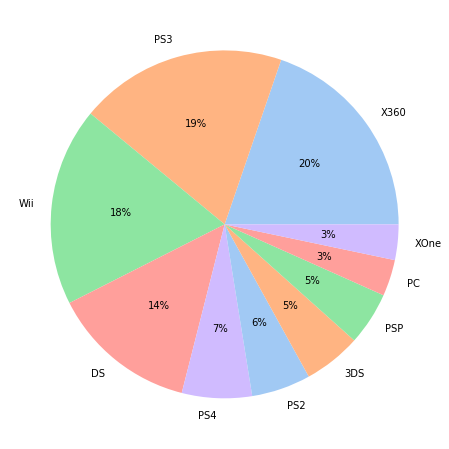

In [26]:
#define data
data = top_platforms
labels = top_platforms.index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Из пироговой диаграмы видно, что:
 * наибольшая доля (20%) приходится на X360, 
 * далее следуют PS3 (19%),
 * Wii (18%),
 * DS (14%).

Для дальнейшего анализа отбросим платформы с низкой долей (меньше 5%) и построим график динамики продаж.

In [27]:
top_platforms = games.pivot_table(
    index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(
    by = 'total_sales', ascending=False).head(6)
top_platforms

,total_sales
platform,
X360,952.99
PS3,931.34
Wii,891.18
DS,655.35
PS4,314.14
PS2,265.80


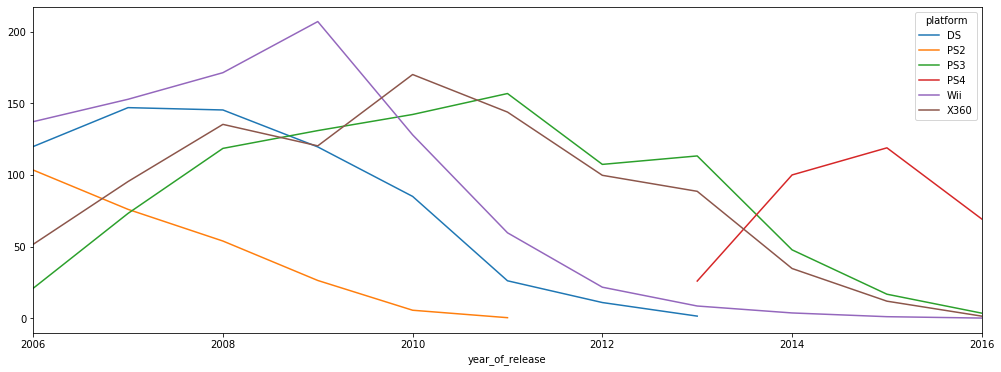

In [28]:
games.query(
    'platform in @top_platforms.index').pivot_table(
    index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum').plot(figsize = (17, 6))
plt.show()

**Выводы из графика:**
    
 * На конец 2016 г. наиболее популярной платформой является PS4 (она наиболее свежая);
 * Видим нисходящие тренды по другим консолям;
 * До 2016 г. отжили свой срок и ушли с рынка PS2, DS;
 * На конец 2016 г. "живы" только 4 платформ из 6 (PS4, PS3, X360, Wii);
 * В целом, можно сделать вывод о стангнации игровой индустрии (консольной/ десктопной). Это объясняется ростом популярности мобильного гейминга и переориентации пользователей от консолей/ десктопных игр на мобильные игры. Статистика показывает, что игровая индустрия растет, если учесть еще и мобильный гейминг.

#### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

Обрежем датасет для построения нужных графиков:

    * выберем только актуальный период для анализа;
    * оставим только топовые платформы.

In [29]:
games_top = games.query('platform in @top_platforms.index')

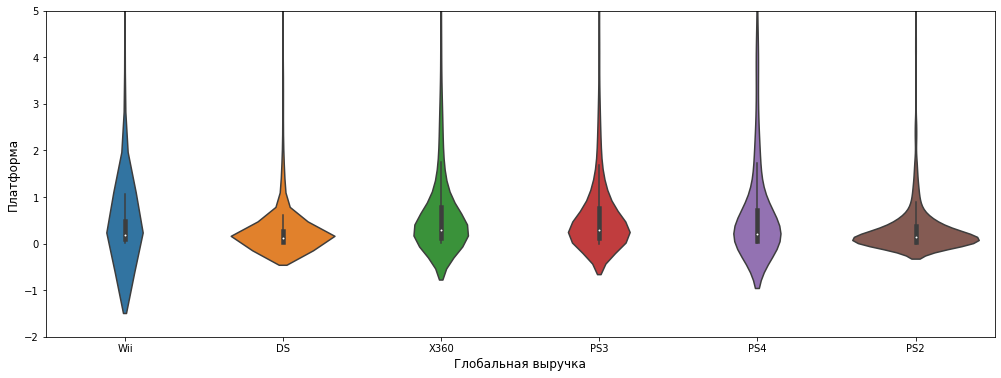

In [30]:
plt.figure(figsize=(17, 6))
plt.grid = True

sns.violinplot(data=games_top, x='platform', y='total_sales')
plt.ylim(-2, 5)

plt.xlabel('Глобальная выручка',fontsize=12)
plt.ylabel('Платформа', fontsize=12)
plt.show()
plt.show()

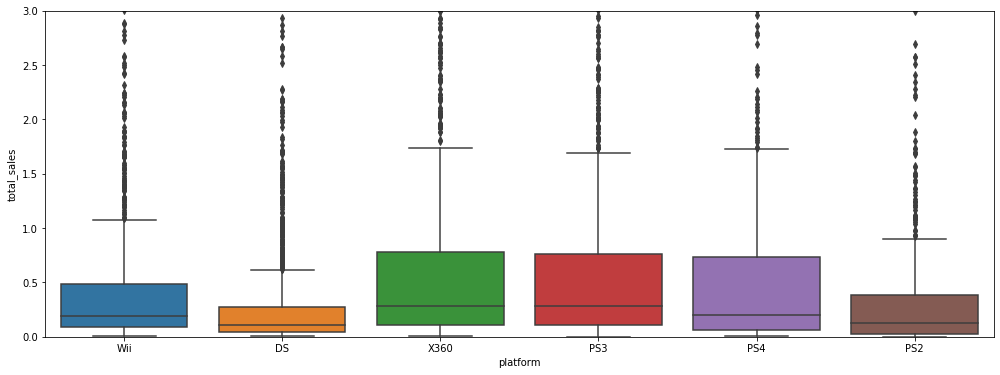

In [31]:
plt.figure(figsize=(17,6))
 
sns.boxplot(data=games_top, x='platform', y='total_sales')
plt.ylim(0, 3)
plt.grid = True
plt.show()

Можно сделать следующие выводы:
 * медиана по этой выборке составляет от 0,2 до 0,25 млн. долл. выручки за игру;
 * самые высокие продажи на платформах X360, PS3, PS4
 * самые низкие продажи у DS, PS2 (они отмирают)
 * у данных есть много выбросов.
 * верхняя граница предела, выше которого начинаются выбросы, самая высокая у трех платформ - PS3, PS4, X360 (около 1,7 млн. долл.), у остальных платформ она около 1 млн. долл. (PS2, Wii), самое низкое значение - у DS - около 0,6 млн. долл.

#### Влияние на продожаи внутри платформы отзывов пользователей и критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы (X360) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [32]:
games_rating = games.query('platform == "X360"')

In [33]:
games_rating.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


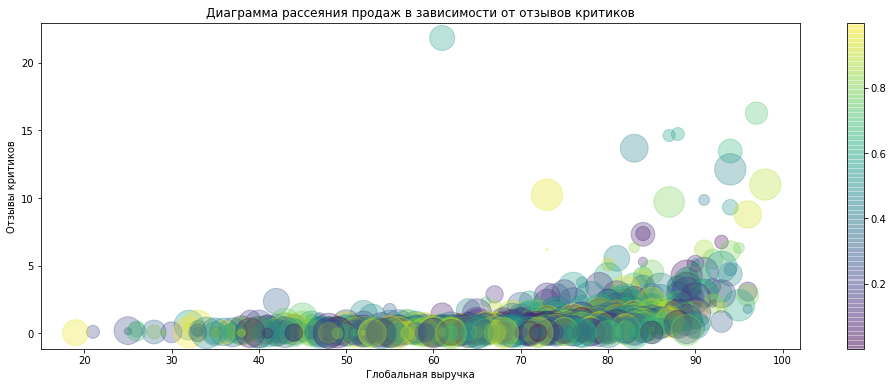

In [34]:
plt.figure(figsize=(17,6))
plt.title('Диаграмма рассеяния продаж в зависимости от отзывов критиков')

rng = np.random.RandomState(0)

x = games_rating['critic_score']
y = games_rating['total_sales']

colors = rng.rand(1214)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

plt.xlabel('Отзывы критиков', fontsize=10)
plt.ylabel('Глобальная выручка',fontsize=10)


plt.show()

Здесь можно сказать, что при увеличении рейтинга от критиков растет средняя глобальная выручка, что является закономерным явлением, так как более качественные игры более популярны, их покупают чаще.

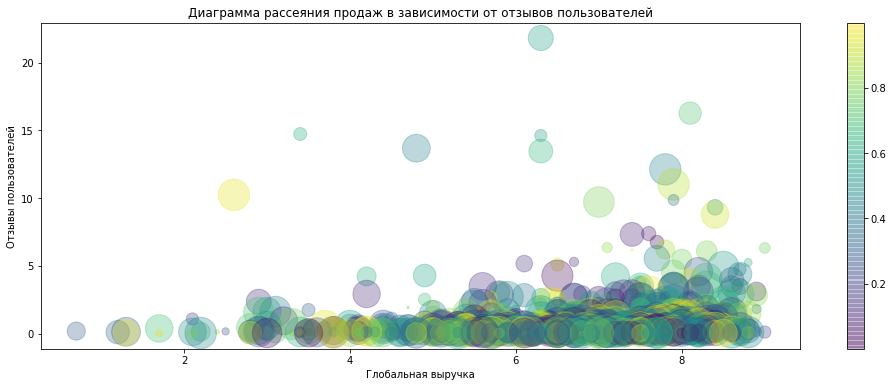

In [35]:
plt.figure(figsize=(17,6))
plt.title('Диаграмма рассеяния продаж в зависимости от отзывов пользователей')
rng = np.random.RandomState(0)

x = games_rating['user_score']
y = games_rating['total_sales']

colors = rng.rand(1214)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

plt.xlabel('Отзывы пользователей', fontsize=10)
plt.ylabel('Глобальная выручка',fontsize=10)

plt.show()

В целом, отзывы пользователей также влияют на выручку: чем выше оценка пользователей, там больше продаж. Но в отличии от картины с критиками, здесь мы можем наблюдать больше выбросов. 

Постоим матрицу корреляции.

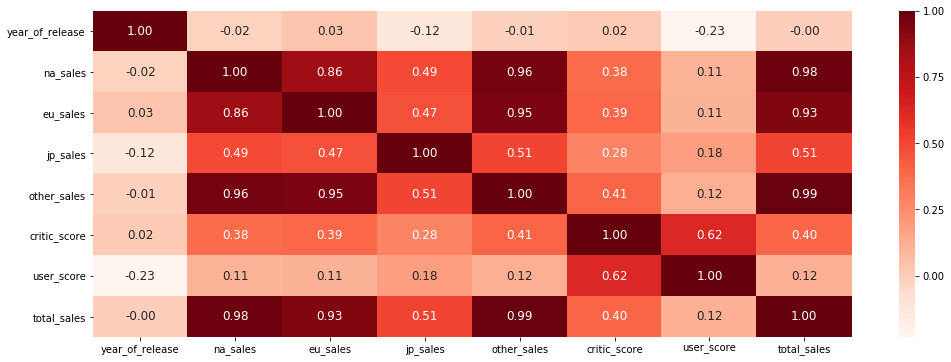

In [36]:
plt.figure(figsize=(17,6))
sns.heatmap(games_rating.corr(), annot=True, cmap="Reds", fmt='.2f', annot_kws={'size':12})
plt.show()

In [37]:
games_rating_filtered = games_rating[['total_sales' ,'critic_score', 'user_score']] # выделение нужных колонок

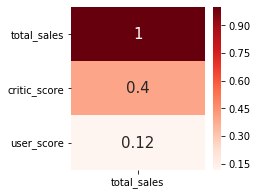

In [38]:
plt.figure(figsize=(3,3))
sns.heatmap(games_rating_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), cmap="Reds", 
            annot=True, annot_kws={'size':15})
plt.show()

**Вывод:** оценка критиков влияет на продажи сильнее (0.4), чем отзывы пользователей (0.12).

Посмотрим также корреляции по другим топовым платформам.

In [39]:
top_platforms.index

Index(['X360', 'PS3', 'Wii', 'DS', 'PS4', 'PS2'], dtype='object', name='platform')

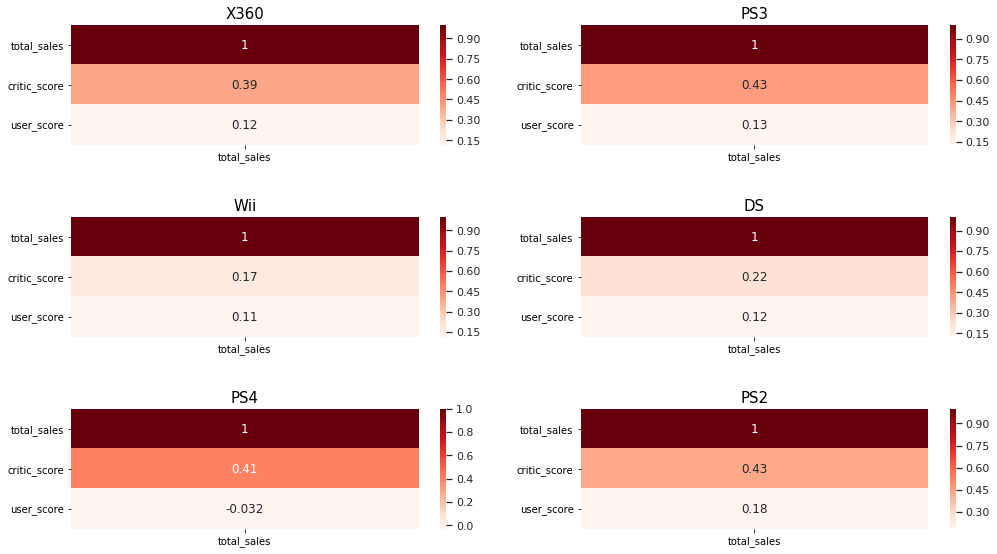

In [40]:
#top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XOne']
top_platforms = ['X360', 'PS3', 'Wii', 'DS', 'PS4', 'PS2']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = games[(games['platform'] == curr_platform) & (games['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="Reds", annot=True, annot_kws={'size':12}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=15)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Итак, данные по самой популярной платформе X360 примерно совпадают с данными по другой популярной платформе PS3, PS2. Ниже зависимость по таким платформам как Wii и DS. При этом по платформам PS3 и PS4 на выручку сильнее влияет рейтинг критика. Также примечательно, что в случае с PS4 рейтинг пользователей имеет отрицательную корреляцию с продажами, но коэффициент корреляции достаточно низкий, чтобы говорить о ярко выраженной тенденции.

#### Исследование жанров игр

Посмотрим на общее распределение игр по жанрам. Рассмотрим самые прибыльные жанры, а также жанры с высокими и низкими продажами.

In [41]:
most_popular_genre = games.groupby('genre').agg({'name':'count'}).reset_index()

In [42]:
most_popular_genre.sort_values(by='name', ascending=False)

,genre,name
0,Action,2382
10,Sports,1262
3,Misc,1253
1,Adventure,1023
7,Role-Playing,996
8,Shooter,737
9,Simulation,606
6,Racing,562
2,Fighting,413
11,Strategy,393


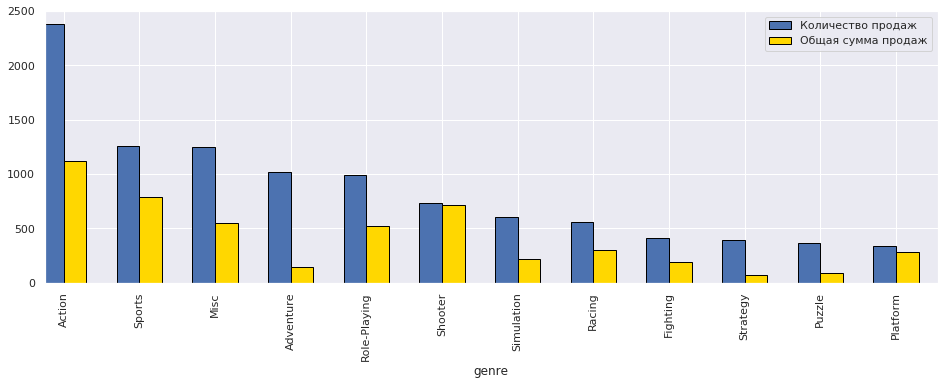

In [43]:
ax = plt.gca()

pivot = games.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(16,5), ec='black', ax=ax, width=0.3, position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(16,5), ec='black', ax=ax, width=0.3, color='#ffd700', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])
plt.show()

Можно сделать следующие **выводы:**

 * Самые популярные жанры по количеству продаж - action, sports, misc (разное), role-playing. Но на их производство требуется больше инвестиций, разница между выручкой и расходами может показывать не такой оптимистичный результат. Но игры этих жанров имеют больше всего поклонников.
 * Лидирующие жанры по общей сумме продаж - action, sports, role-playing.
 * Жанры с низкими продажами - Puzzle, Strategy, Fighting, Stimulation. Игры этих жанров не очень популярны у пользователей.

### Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5)

Проанализируем самые популярные платформы в разрезе региона.

In [44]:
games_region = games.query('platform in @top_platforms')
games_platforms_region = games_region.groupby('platform').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})

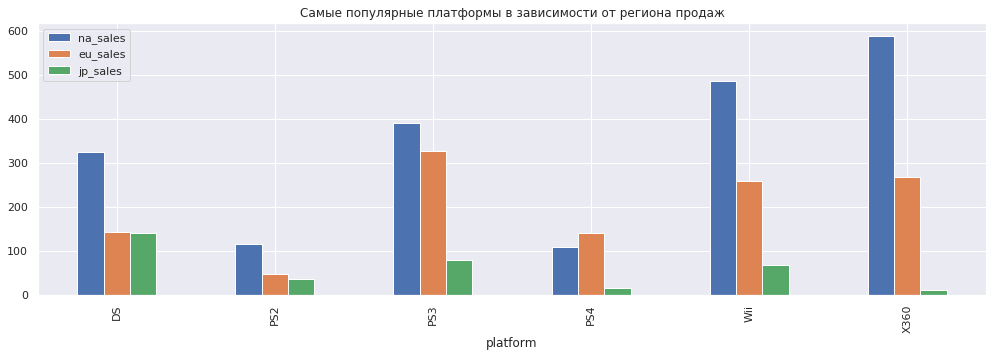

In [45]:
games_platforms_region.plot(kind='bar', figsize=(17, 5), title = 'Самые популярные платформы в зависимости от региона продаж')
plt.show()

Выводы: почти по всем платформам продаж больше всего по региону Северная Америка. Но так как продажи по Северной Америке наиболее высокие в целом, следует подробнее рассмотреть каждый регион, чтобы выявить наиболее популярные платформы в нем.

In [46]:
def describe_region(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Северная Америка: продажи, млн. долл.', 
                  'eu_sales': 'Европа: продажи, млн. долл.', 
                  'jp_sales': 'Япония: продажи, млн. долл.'}
    color_dict = {'na_sales': 'skyblue', 'eu_sales': 'gold', 'jp_sales': 'palegreen'}
    
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=12, color=color_dict[region_sales], rot=20)
    
    plot.legend(prop={'size':14})
    plot.set_xlabel('')
    plot.title.set_size(20)

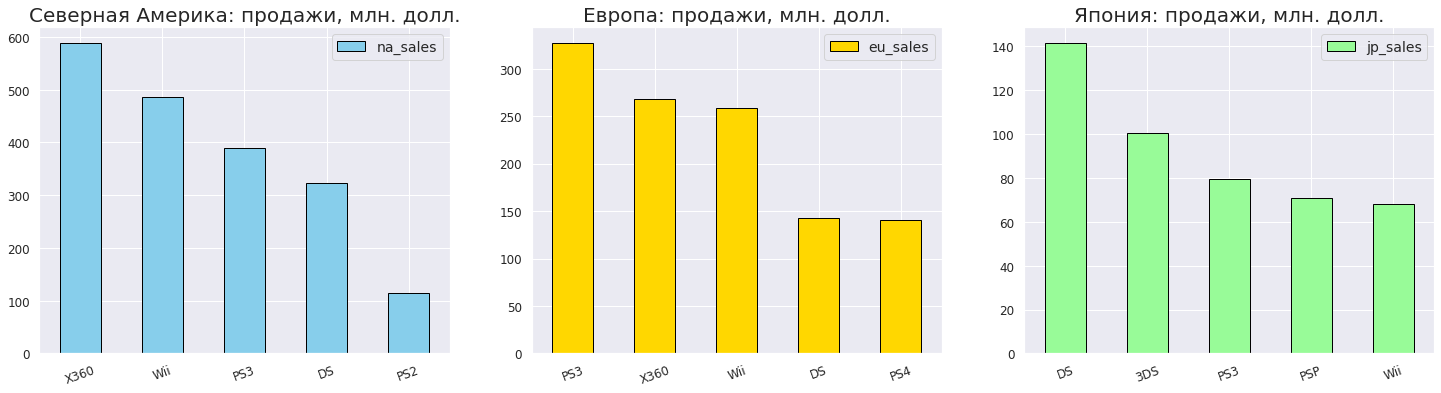

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

describe_region('platform', 'na_sales', 0)
describe_region('platform', 'eu_sales', 1)
describe_region('platform', 'jp_sales', 2)

**Выводы:**
  * в Северной Америке наиболее популярная платформа - X360, наименее популярная - PS2;
  * в Европе предпочитают PS3, а также X360, платформы DS и PS4 не пользуются популярностью;
  * в Японии обратные тренды: здесь любят DS, 3DS.

#### Самые популярные жанры (топ-5).

Рассмотрим самые популярные жанры в зависимости от региона.

In [48]:
games_genre_region = games_region.groupby('genre').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})

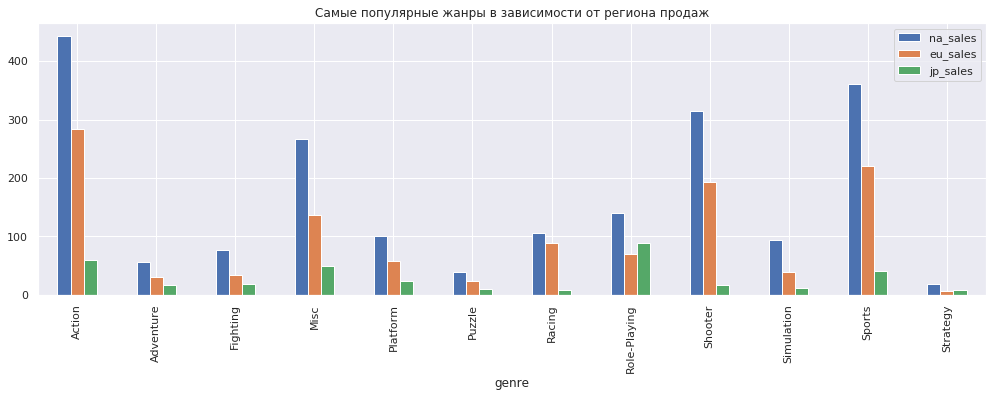

In [49]:
games_genre_region.plot(kind='bar', figsize=(17, 5), title = 'Самые популярные жанры в зависимости от региона продаж')
plt.show()

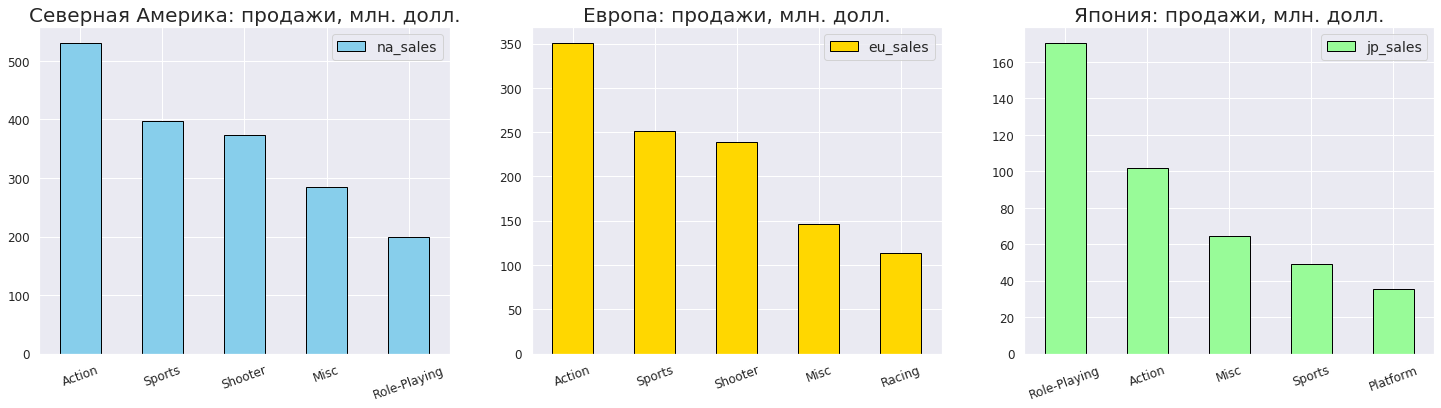

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

describe_region('genre', 'na_sales', 0)
describe_region('genre', 'eu_sales', 1)
describe_region('genre', 'jp_sales', 2)

**Выводы:**
  * в Северной Америке любят жанры Action, Sports, Shooter, misc, Role-playing;
  * в Европе вкусы совпадают в Северной Америкой, но вместо ролевых игр имеет популярность жанр Racing;
  * в Японии всё наоборот - здесь самый популярный жанр - Role-Playing. Также любят action, misc, sports.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [51]:
games['rating'].unique()

array(['E', 'M', nan, 'T', 'E10+', 'EC', 'RP'], dtype=object)

**Entertainment Software Rating Board (ESRB)** — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). К началу 2003 года рейтинги ESRB получили более 8000 продуктов от 350 издателей.

Описание:
 * **«EC» («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».
 * **«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")
 * **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
 * **«T» («Teen»)** — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
 * **«M» («Mature»)** — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
 * **«RP» («Rating Pending»)** — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [52]:
ESRB_dict = {'E': 'E: Для всех', 
             'M': 'M: > 17 лет', 
             'T': 'T: 13-19 лет', 
             'E10+': 'E10+: >10 лет', 
             'EC': 'EC: от 3 лет',
             'RP': 'RP: Рейтинг ожидается'}

In [53]:
games['ESRB_description'] = games[games['rating'].notnull()]['rating'].map(ESRB_dict)

In [54]:
games_ESRB_region = games_region.groupby('rating').agg({'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})

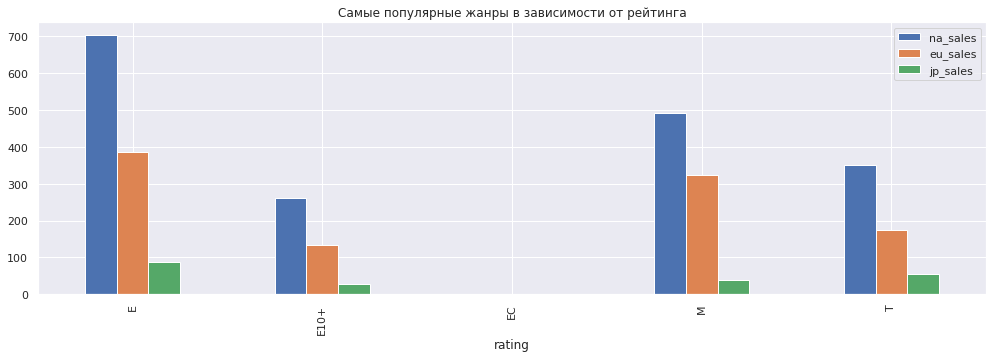

In [55]:
games_ESRB_region.plot(kind='bar', figsize=(17, 5), title = 'Самые популярные жанры в зависимости от рейтинга')
plt.show()

Из графика видно, что чаще всего продпочтения отдаются играм категории "для всех", самая непопулярная категория - игры для маленьких детей.

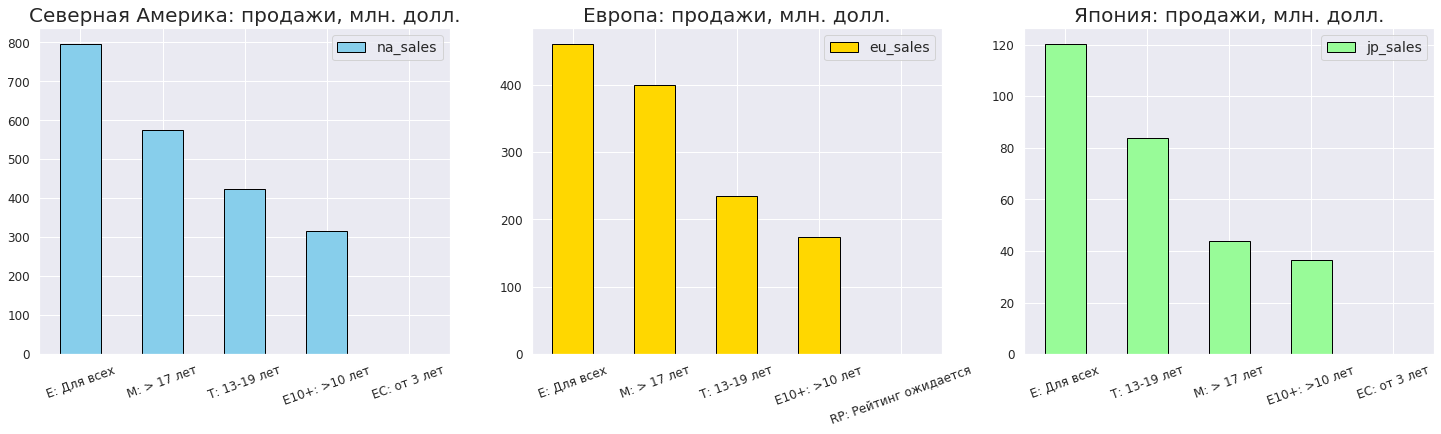

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

describe_region('ESRB_description', 'na_sales', 0)
describe_region('ESRB_description', 'eu_sales', 1)
describe_region('ESRB_description', 'jp_sales', 2)

В Северной Америке и Европе чаще всего покупают игры категорий E, M, T. 
В Японии также предпочитают игры с рейтингом E, но категория T (подростковые игры) популярнее, чем категория M. 

### Проверка гипотез и пояснения

На этом шаге проверим гипотезы:
 * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 
Так как выборки независимы между собой, то будем использовать t-критерий Стьюдента для проверки обоих гипотез.

In [57]:
alpha = 0.05

#### Первая гипотеза

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
 * **Н0** (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 * **Н1** (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [58]:
xbox_one_ratings = games_data[(games_data['platform'] == 'XOne') & (games_data['user_score'] > 0)]['user_score']
pc_ratings = games_data[(games_data['platform'] == 'PC') & (games_data['user_score'] > 0)]['user_score']

Будем использовать метод ttest_ind() из библиотеки scipy.

In [59]:
results = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

In [60]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.935072360183565e-06
Отвергаем нулевую гипотезу


**Вывод:** средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Посмотрим, у какой платформы выше пользовательский рейтинг.

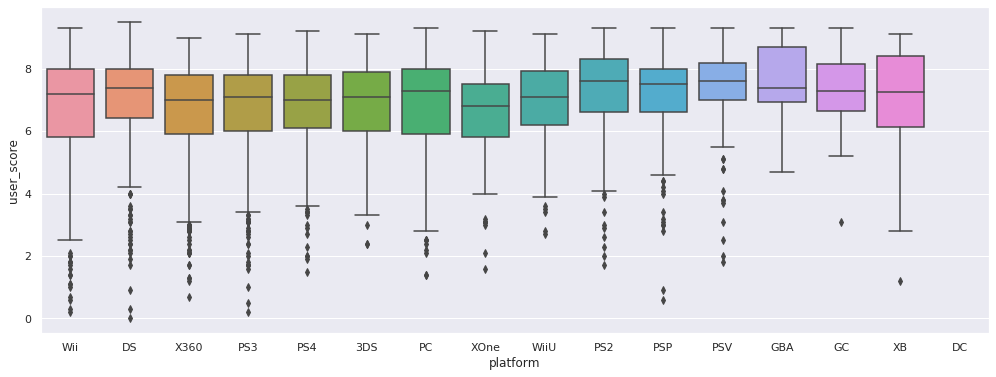

In [61]:
plt.figure(figsize=(17,6))
ax = sns.boxplot(x="platform", y="user_score", data=games)
plt.show()

In [62]:
platforms_list = ['XOne', 'PC']

In [63]:
games_test_1 = games_data.query('platform in @platforms_list')

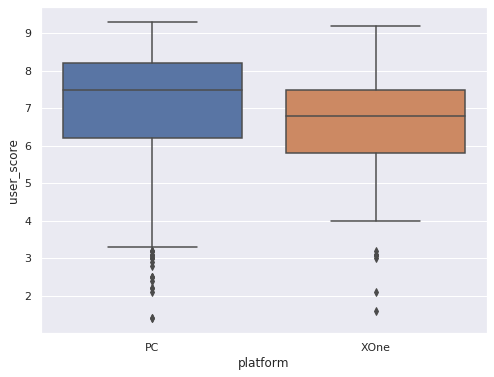

In [64]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x="platform", y="user_score", data=games_test_1)
plt.show()

In [65]:
xbox_one_ratings.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [66]:
pc_ratings.describe()

count    770.000000
mean       7.062468
std        1.529963
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64

Действительно, есть статичтически значимое различие между средним значением пользовательского рейтинга на данных платформах. Доверительные интервалы также отличаются. У компьютерных игр (PC) пользовательский рейтинг выше, чем у игр Xbox One.

#### Вторая гипотеза

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

 * **Н0** (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.
 * **Н1** (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [67]:
action_ratings = games_data[(games_data['genre'] == 'Action') & (games_data['user_score'] > 0)]['user_score']
sports_ratings = games_data[(games_data['genre'] == 'Sports') & (games_data['user_score'] > 0)]['user_score']

In [68]:
results = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

In [69]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11483818791498286
Не получилось отвергнуть нулевую гипотезу


Итак, нулевую гипотезу не получилось отвергнуть, - это означает, что пользовательские рейтинги жанров Action и Sports одинаковые.

### Заключение

Были сделаны следующие выводы:
 * положение игровой индустрии без учета мобильных игр находится на этапе стагнации - количество выпущенных игр имело восходящий тренд с 1980 г. до 2008 г. Пиковые значения приходятся на 2008 и 2009 годы. Далее количество игр падает;
 * можно наблюдать как платформы сменяют одна другую (PS, PS2, PS3, PS4). Средний срок жизненного цикла около 10 лет.
 * на уровень продаж сильно влияют оценки критиков, оценки пользователей не оказывают такого воздействия.
 
В результате проверки гипотез было показано, что:
 * Средние пользовательские рейтинги платформ Xbox One и PC разные (у PC выше рейтинг);
 * Средние пользовательские рейтинги жанров Action и Sports совпадают.